In [ ]:
import pandas as pd # load and manipulate data and for One-Hot Encoding
import numpy as np # calculate the mean and standard deviation
import matplotlib.pyplot as plt # drawing graphs
from sklearn.tree import DecisionTreeClassifier # a classification tree
from sklearn.tree import plot_tree # draw a classification tree
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn.model_selection import cross_val_score # cross validation
from sklearn.metrics import confusion_matrix # creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix

In [ ]:

from google.colab import files 
  
  
uploaded = files.upload()

Saving processed.cleveland.data to processed.cleveland.data


In [ ]:
import pandas as pd 
import io 
df = pd.read_csv(io.BytesIO(uploaded['processed.cleveland.data'])) 
print(df)

     63.0  1.0  1.0.1  145.0  233.0  1.0.2  ...  0.0  2.3  3.0  0.0.1  6.0  0
0    67.0  1.0    4.0  160.0  286.0    0.0  ...  1.0  1.5  2.0    3.0  3.0  2
1    67.0  1.0    4.0  120.0  229.0    0.0  ...  1.0  2.6  2.0    2.0  7.0  1
2    37.0  1.0    3.0  130.0  250.0    0.0  ...  0.0  3.5  3.0    0.0  3.0  0
3    41.0  0.0    2.0  130.0  204.0    0.0  ...  0.0  1.4  1.0    0.0  3.0  0
4    56.0  1.0    2.0  120.0  236.0    0.0  ...  0.0  0.8  1.0    0.0  3.0  0
..    ...  ...    ...    ...    ...    ...  ...  ...  ...  ...    ...  ... ..
297  45.0  1.0    1.0  110.0  264.0    0.0  ...  0.0  1.2  2.0    0.0  7.0  1
298  68.0  1.0    4.0  144.0  193.0    1.0  ...  0.0  3.4  2.0    2.0  7.0  2
299  57.0  1.0    4.0  130.0  131.0    0.0  ...  1.0  1.2  2.0    1.0  7.0  3
300  57.0  0.0    2.0  130.0  236.0    0.0  ...  0.0  0.0  2.0    1.0  3.0  1
301  38.0  1.0    3.0  138.0  175.0    0.0  ...  0.0  0.0  1.0      ?  3.0  0

[302 rows x 14 columns]


In [ ]:
df.head()

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   63.0    302 non-null    float64
 1   1.0     302 non-null    float64
 2   1.0.1   302 non-null    float64
 3   145.0   302 non-null    float64
 4   233.0   302 non-null    float64
 5   1.0.2   302 non-null    float64
 6   2.0     302 non-null    float64
 7   150.0   302 non-null    float64
 8   0.0     302 non-null    float64
 9   2.3     302 non-null    float64
 10  3.0     302 non-null    float64
 11  0.0.1   302 non-null    object 
 12  6.0     302 non-null    object 
 13  0       302 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


In [ ]:
df.columns=['age','sex','cp','restbp','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','hd']
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [ ]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [ ]:
df['ca'].unique()

array(['3.0', '2.0', '0.0', '1.0', '?'], dtype=object)

In [ ]:
df['thal'].unique()

array(['3.0', '7.0', '6.0', '?'], dtype=object)

In [ ]:
len(df.loc[(df['ca']=='?')|(df['thal']=='?')])

6

In [ ]:
df.loc[(df['ca']=='?')|(df['thal']=='?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
86,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
165,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
191,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
265,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
286,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
301,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [ ]:
len(df)

302

In [ ]:
df_no_missing=df.loc[(df['ca']!='?')&(df['thal']!='?')]

In [ ]:
len(df_no_missing)

296

In [ ]:
X=df_no_missing.drop('hd',axis=1).copy()
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0


In [ ]:
y=df_no_missing['hd'].copy()
y.head()

0    2
1    1
2    0
3    0
4    0
Name: hd, dtype: int64

In [ ]:
X['cp'].unique()

array([4., 3., 2., 1.])

In [ ]:
X_encoded=pd.get_dummies(X,columns=['cp','restecg','slope','thal']).head()
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,cp_2.0,cp_3.0,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,0,0,1,0,0,1,0,1,0,1,0,0
1,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,0,0,1,0,0,1,0,1,0,0,0,1
2,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,0,1,0,1,0,0,0,0,1,1,0,0
3,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,1,0,0,0,0,1,1,0,0,1,0,0
4,56.0,1.0,120.0,236.0,0.0,178.0,0.0,0.8,0.0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [ ]:
y.unique()

array([2, 1, 0, 3, 4])

In [ ]:
y_not_zero_index=y>0
y[y_not_zero_index]=1
y.unique()

array([1, 0])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
clf_dt=DecisionTreeClassifier(random_state=42)
clf_dt=clf_dt.fit(X_train,y_train)

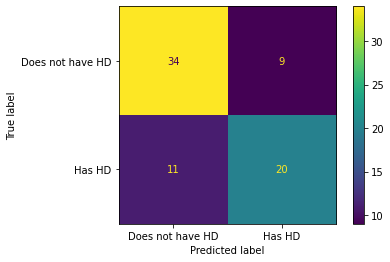

In [ ]:
plot_confusion_matrix(clf_dt,X_test,y_test,display_labels=["Does not have HD","Has HD"])

In [ ]:
path=clf_dt.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas,impurities=path.ccp_alphas,path.impurities
ccp_alphas=ccp_alphas[:-1]

clf_dts=[]
for ccp_alpha in ccp_alphas:
  clf_dt=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
  clf_dt=clf_dt.fit(X_train,y_train)
  clf_dts.append(clf_dt)


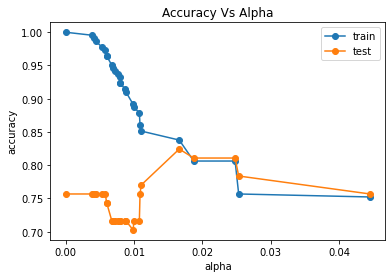

In [ ]:
train_scores=[clf_dt.score(X_train,y_train) for clf_dt in clf_dts]
test_scores=[clf_dt.score(X_test,y_test)for clf_dt in clf_dts]

fig,ax=plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy Vs Alpha")
ax.plot(ccp_alphas,train_scores,marker='o',label="train")
ax.plot(ccp_alphas,test_scores,marker='o',label="test")
ax.legend()
plt.show()

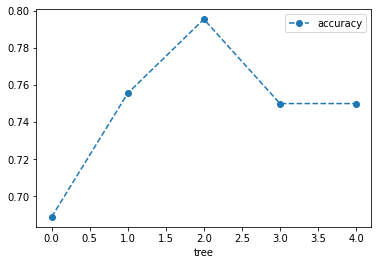

In [ ]:
clf_dt=DecisionTreeClassifier(random_state=42,ccp_alpha=0.016)
scores=cross_val_score(clf_dt,X_train,y_train,cv=5)
df=pd.DataFrame(data={'tree':range(5),'accuracy':scores})
df.plot(x='tree',y='accuracy',marker='o',linestyle='--')

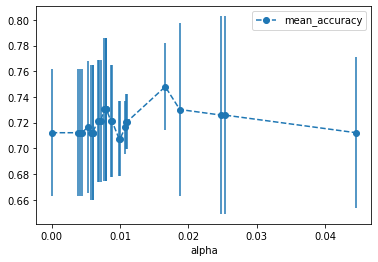

In [ ]:
alpha_loop_values=[]
for ccp_alpha in ccp_alphas:
  clf_dt=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
  scores=cross_val_score(clf_dt,X_train,y_train,cv=5)
  alpha_loop_values.append([ccp_alpha,np.mean(scores),np.std(scores)])
alpha_results=pd.DataFrame(alpha_loop_values,columns=['alpha','mean_accuracy','std'])
alpha_results.plot(x='alpha',y='mean_accuracy',yerr='std',marker='o',linestyle='--')




In [ ]:
alpha_results[(alpha_results['alpha'] > 0.014) 
               & 
              (alpha_results['alpha']<0.015)]

,alpha,mean_accuracy,std


In [ ]:
ideal_cpp_alpha=alpha_results[(alpha_results['alpha']>0.014) 
                              & 
                              (alpha_results['alpha']<0.015)]['alpha']
ideal_cpp_alpha

In [ ]:
clf_dt_pruned=DecisionTreeClassifier(random_state=42,ccp_alpha=ideal_cpp_alpha)
clf_dt_pruned=clf_dt_pruned.fit(X_train,y_train)

ValueError: ignored